In [24]:
import numpy as np
from pyraysum import Model, Geometry, Control, run, prs

In [25]:
v_p = np.array([1800, 2800, 3900])
v_s = v_p * 2/3

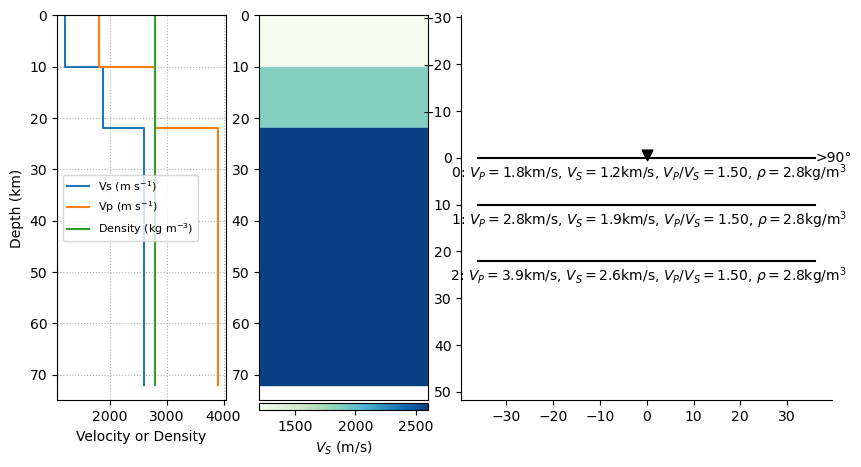

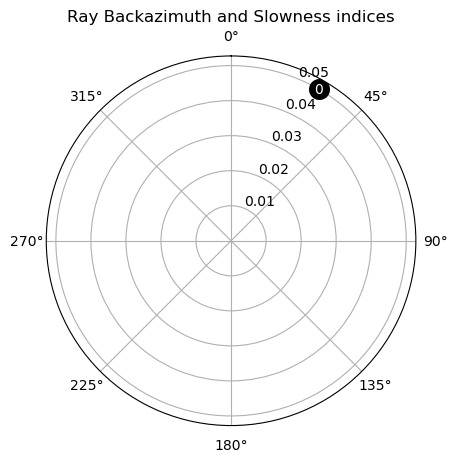

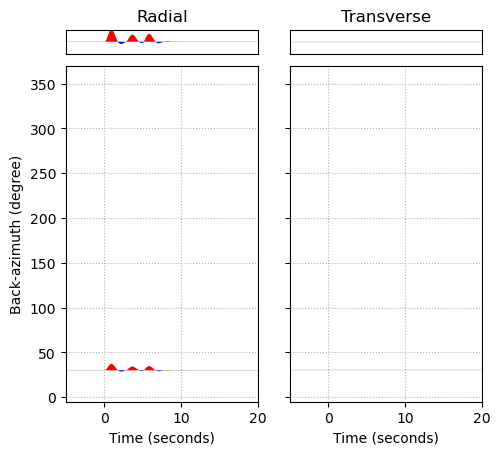

In [30]:
# Build a 1-layer-over-half-space subsurface model
model = Model(
    thickn=[10000, 12000, 0],  # m; half-space thickness is irrelevant
    rho=[2800, 2800, 2800],  # kg/m^3
    vp=v_p,
    vs=v_s,
)
model.plot()

# Define back-azimuth range and single horizontal slowness value
geometry = Geometry(baz=30, slow=0.05)

geometry.plot()

# Set sampling interval, number of points, alignment and ray-coordinate rotation
control = Control(dt=1./20., npts=800, align="P", rot="RTZ")

# Run the simulation
result = run(model, geometry, control, rf=True)

# Filter below 2s period
result.filter("rfs", "lowpass", freq=0.5)

# Plot the results
result.plot("rfs")

In [33]:
rc = Control(dt=0.025, npts=1500, mults=1, rot=1)
streamlist = prs.run(model, geometry, rc, rf=True)

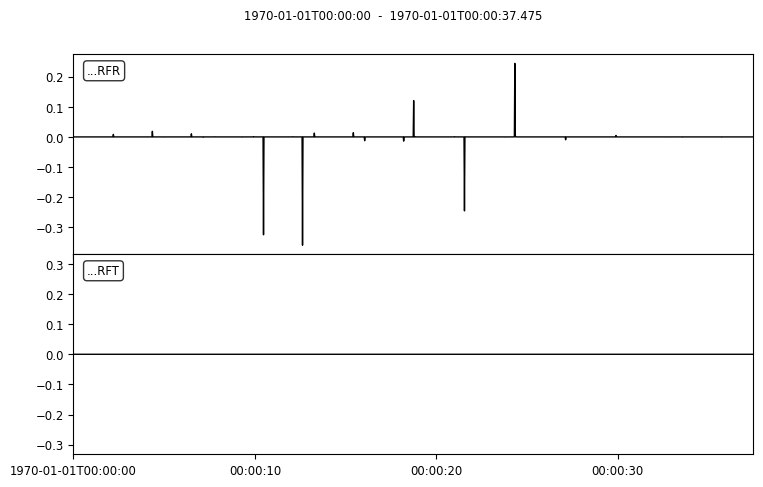

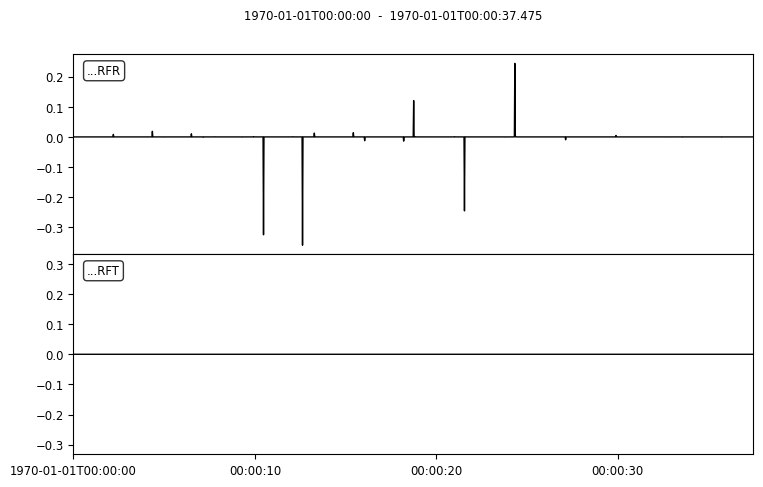

In [34]:

streamlist.filter('streams', 'lowpass', freq=1., corners=2, zerophase=True)

streamlist.rfs[0].plot()